In [ ]:
# Bruno Ugolini

# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import pandas_datareader.data as data
%matplotlib inline

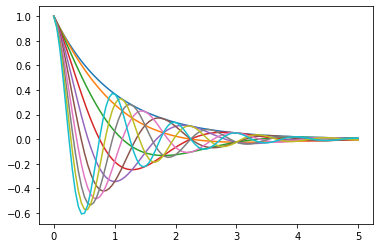

In [21]:
thetas = np.linspace(0,2,10)
x = np.linspace(0,5,100)
for theta in thetas:
    f = np.cos(np.pi * theta * x) * np.exp(-x)
    plt.plot(x, f)

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

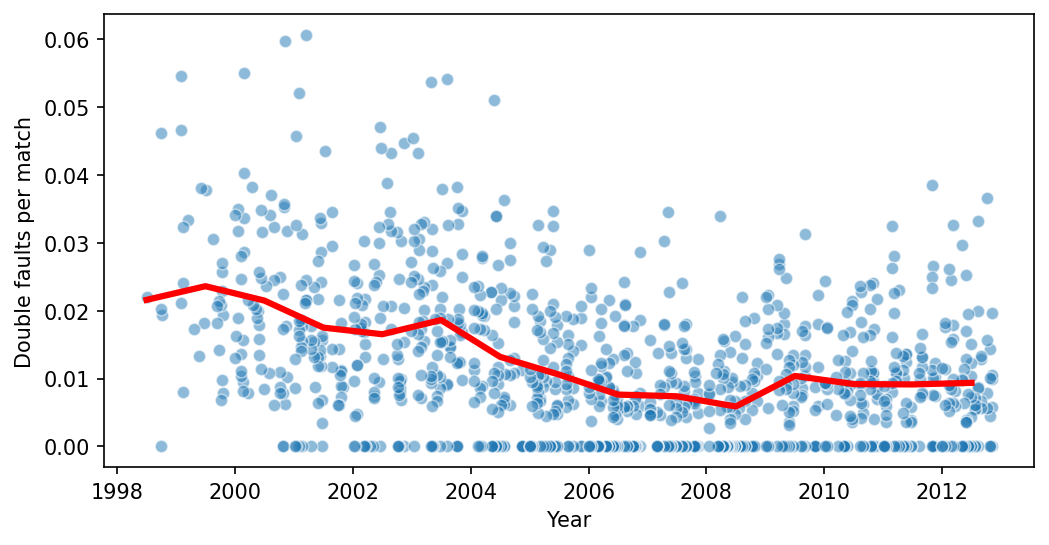

In [42]:
df = pd.read_csv('data/tennis.csv')
df['start date'] = pd.to_datetime(df['start date'], format='%Y-%m-%d')
df['Double faults per match'] = df['player1 double faults'] / df['player1 total points total']
plt.figure(dpi=150, figsize=(8,4))
sns.scatterplot(data=df, 
                x='start date', 
                y='Double faults per match', 
                alpha=0.5)
plt.xlabel('Year')
df1 = df.groupby(by='year').mean()['Double faults per match']
plt.plot(pd.to_datetime(df1.index,format='%Y')+timedelta(days=182), 
         df1.values,
         lw=3,
         color='red')
plt.show()

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


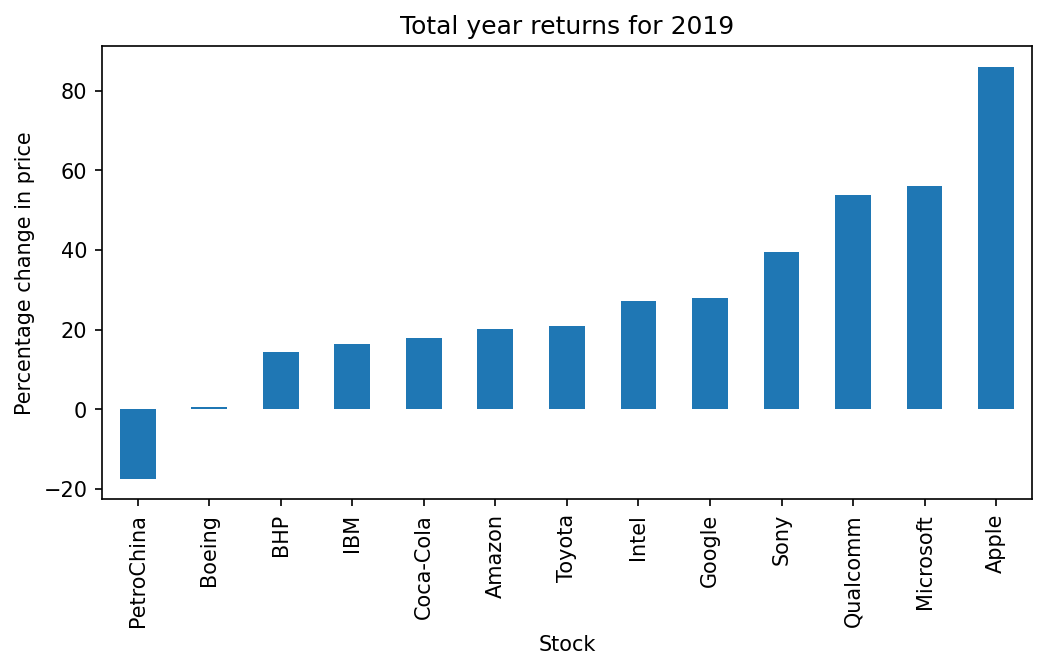

In [23]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

tick_frst_lst = ticker.drop(ticker.index[1:-1]).reset_index().drop('Date',axis=1)
tick_frst_lst = tick_frst_lst.rename(columns=ticker_list)

fl=(tick_frst_lst.xs(1) - tick_frst_lst.xs(0))/tick_frst_lst.xs(0) * 100

plt.figure(dpi=150, figsize=(8,4))
fl.sort_values().plot(kind='bar')
plt.ylabel('Percentage change in price')
plt.xlabel('Stock')
plt.title('Total year returns for 2019');

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [46]:
ticker_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
def read_data(ticker_list,
          start=dt.datetime(1928, 1, 1),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo',start,end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

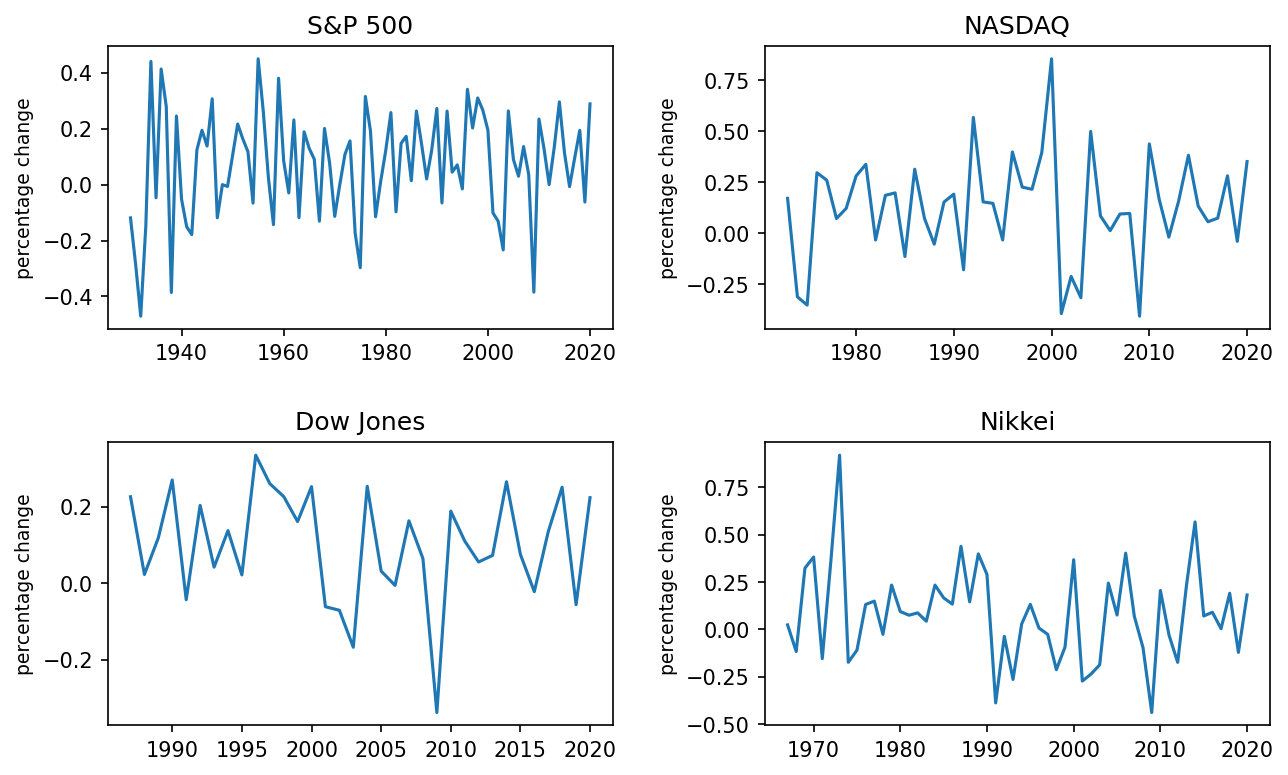

In [55]:
dfYearly = ticker.fillna(method='ffill').asfreq('BA').pct_change()
dfYearly = dfYearly.rename(columns=ticker_list)

# make the plots
num_rows, num_cols = 2, 2
fig, axes = plt.subplots(num_rows, num_cols,dpi=150,figsize=(10,6))
cnt = 0
for i in range(num_rows):
    for j in range(num_cols):
        # get the title and make the plots
        indx = dfYearly.columns[cnt]
        axes[i, j].plot(dfYearly.index,dfYearly[indx])
        axes[i, j].set(title=indx)
        axes[i, j].set_ylabel('percentage change',fontsize=9)
        # set up a nice x-axis
        xmin, xmax = axes[i, j].get_xlim()
        Nyr = 5 # tickmark length in years
        Y = 37 # number of years limit
        while (xmax-xmin) > (365*Y):
            Nyr *= 2
            Y *= 2  
        years = mdates.YearLocator(Nyr)   # every decade
        years_fmt = mdates.DateFormatter('%Y')
        axes[i, j].xaxis.set_major_locator(years)
        axes[i, j].xaxis.set_major_formatter(years_fmt)
        cnt += 1
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
plt.show()

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

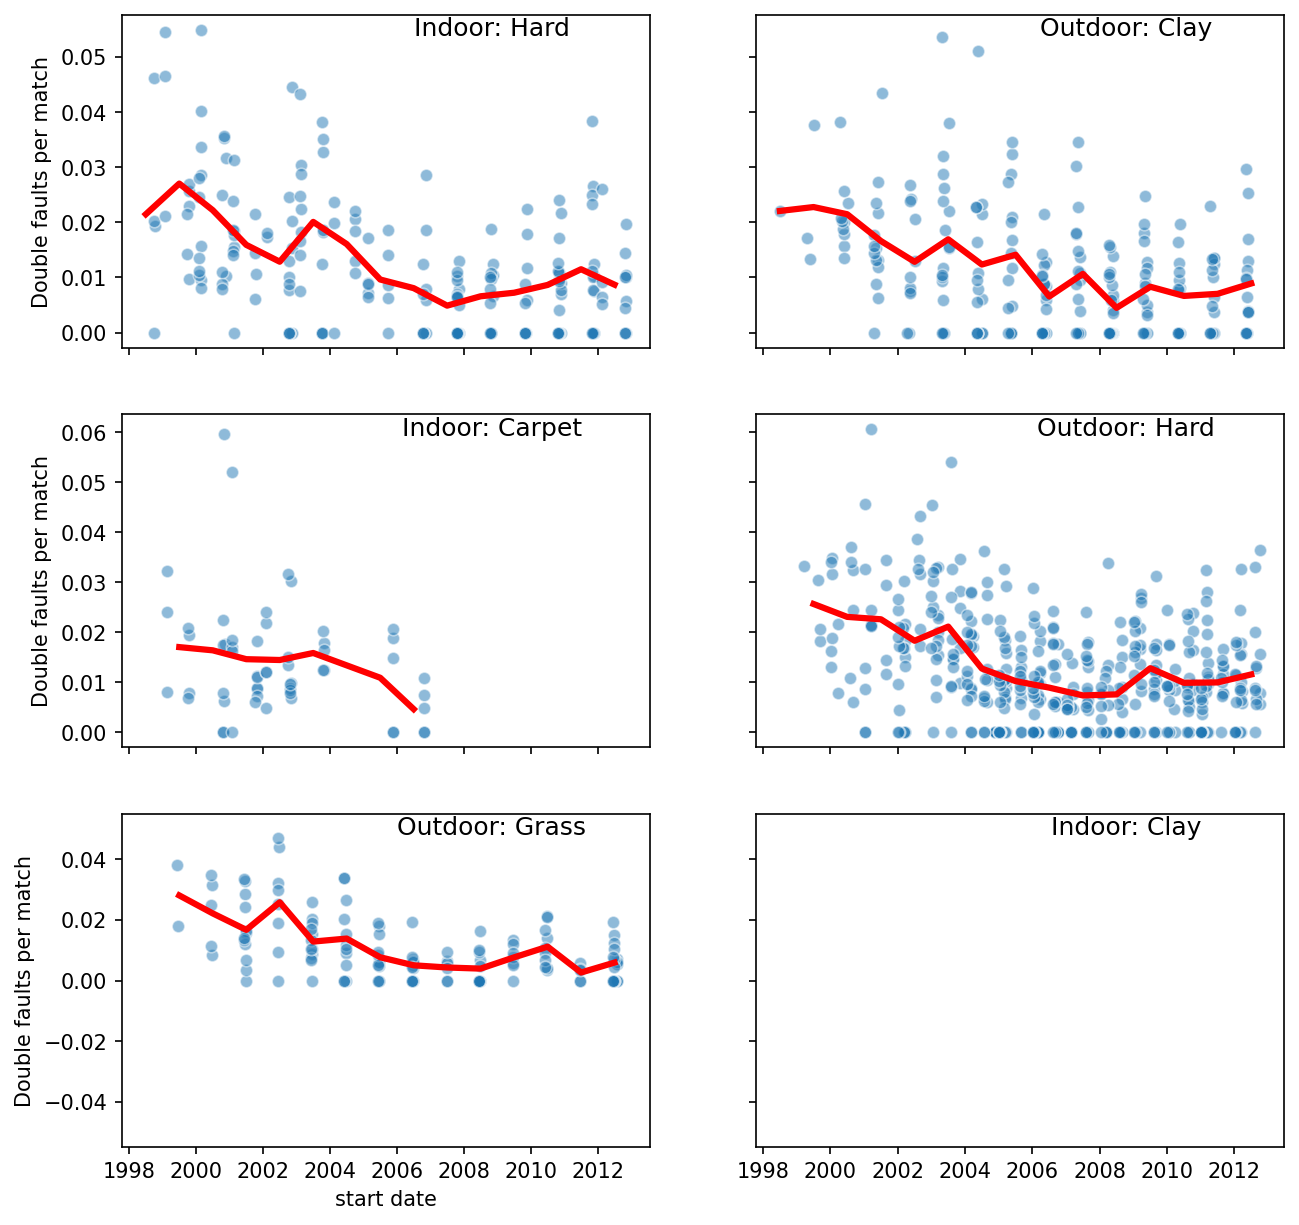

In [39]:
df = pd.read_csv('data/tennis.csv')
df['start date'] = pd.to_datetime(df['start date'], format='%Y-%m-%d')
df['Double faults per match'] = df['player1 double faults'] / df['player1 total points total']

surfaces = df.surface.unique()
df = df.set_index(['surface'])

num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, 
                         num_cols,
                         dpi=150,
                         figsize=(10,10),
                         sharex='col',
                         sharey='row'
                        )
cnt = 0

for i in range(num_rows):
    for j in range(num_cols):
        surface = surfaces[cnt]
        # create the dataframe of interest 
        # i.e. for that one surface
        df1 = df.loc[df.index.get_level_values('surface') == surface,
                     ['start date','year','Double faults per match']].dropna()
        # plot the points
        sns.scatterplot(data=df1,
                        x='start date',
                        y='Double faults per match',
                        alpha=0.5,
                        ax=axes[i,j])
        axes[i,j].set_title(surface, x=0.7, y= 0.9)
        # plot the mean line (and shift
        # it have a year to the right)
        df2 = df1.groupby(by='year').mean()
        axes[i,j].plot(pd.to_datetime(df2.index,format='%Y')+timedelta(days=182),
                       df2['Double faults per match'],
                       lw=3,
                       color='red')
        cnt += 1